<a href="https://colab.research.google.com/github/ThisIsJorgeLima/Unit-2-Project/blob/master/JAL_DS10_Project_2_Workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

##Setup

In [0]:
# Read data
import pandas as pd
url = 'https://raw.githubusercontent.com/ThisIsJorgeLima/Unit-2-Project/master/Oscars.csv'
df = pd.read_csv(url)

# Check data shape
assert df.shape == (1482, 24)


In [53]:
# Pandas Profiling can be very slow with medium & large datasets.
# These parameters will make it faster.
# https://github.com/pandas-profiling/pandas-profiling/issues/222

import pandas_profiling

profile_report = train.profile_report(
    check_correlation_pearson=False,
    correlations={
        'pearson': False,
        'spearman': False,
        'kendall': False,
        'phi_k': False,
        'cramers': False,
        'recoded': False,
    },
    plot={'histogram': {'bayesian_blocks_bins': False}},
)

profile_report

## Load Validate / Exploration

In [0]:
# Looking at the help documentation:
?pd.read_csv

In [70]:
import numpy as np

pd.options.display.max_rows=1482
pd.options.display.max_columns=24
df.replace("?", np.NaN)
print(df.shape)
df.head(3)

(1482, 24)


,year,category,film,name,BAFTA,Golden Globe,Guild,Oscar,running_time,box_office,imdb_score,rt_audience_score,rt_critic_score,stars_count,writers_count,produced_USA,R,PG,PG13,G,q1_release,q2_release,q3_release,q4_release
0,1980,Actor,Raging Bull,Robert De Niro,0.0,1.0,0.0,1.0,129,23400000.0,8.2,93.0,97.0,6.0,2.0,1,1,0,0,0,0,0,0,1
1,1980,Actor,The Great Santini,Robert Duvall,0.0,0.0,0.0,0.0,115,4700000.0,7.2,76.0,94.0,3.0,1.0,1,0,1,0,0,0,0,0,1
2,1980,Actor,The Elephant Man,John Hurt,1.0,0.0,0.0,0.0,124,26000000.0,8.2,93.0,90.0,5.0,3.0,1,0,1,0,0,0,0,0,1


In [71]:
df.shape

(1482, 24)

In [72]:
df.head(3)

,year,category,film,name,BAFTA,Golden Globe,Guild,Oscar,running_time,box_office,imdb_score,rt_audience_score,rt_critic_score,stars_count,writers_count,produced_USA,R,PG,PG13,G,q1_release,q2_release,q3_release,q4_release
0,1980,Actor,Raging Bull,Robert De Niro,0.0,1.0,0.0,1.0,129,23400000.0,8.2,93.0,97.0,6.0,2.0,1,1,0,0,0,0,0,0,1
1,1980,Actor,The Great Santini,Robert Duvall,0.0,0.0,0.0,0.0,115,4700000.0,7.2,76.0,94.0,3.0,1.0,1,0,1,0,0,0,0,0,1
2,1980,Actor,The Elephant Man,John Hurt,1.0,0.0,0.0,0.0,124,26000000.0,8.2,93.0,90.0,5.0,3.0,1,0,1,0,0,0,0,0,1


In [73]:
df.tail(3)

,year,category,film,name,BAFTA,Golden Globe,Guild,Oscar,running_time,box_office,imdb_score,rt_audience_score,rt_critic_score,stars_count,writers_count,produced_USA,R,PG,PG13,G,q1_release,q2_release,q3_release,q4_release
1479,2016,Supporting Actress,Lion,Nicole Kidman,0.0,0.0,0.0,0.0,118,76300000.0,8.0,93.0,86.0,4.0,1.0,0,0,0,1,0,1,0,0,0
1480,2016,Supporting Actress,Hidden Figures,Octavia Spencer,0.0,0.0,0.0,0.0,127,169100000.0,7.9,94.0,92.0,6.0,2.0,1,0,1,0,0,1,0,0,0
1481,2016,Supporting Actress,Manchester by the Sea,Michelle Williams,0.0,0.0,0.0,0.0,137,60700000.0,8.1,81.0,96.0,4.0,1.0,1,1,0,0,0,0,0,0,1


## Data Exploration

In [74]:
df.dtypes

year                   int64
category              object
film                  object
name                  object
BAFTA                float64
Golden Globe         float64
Guild                float64
Oscar                float64
running_time           int64
box_office           float64
imdb_score           float64
rt_audience_score    float64
rt_critic_score      float64
stars_count          float64
writers_count        float64
produced_USA           int64
R                      int64
PG                     int64
PG13                   int64
G                      int64
q1_release             int64
q2_release             int64
q3_release             int64
q4_release             int64
dtype: object

In [78]:
# Here we can see the breakdown of the count, mean, std, min, and percentile by 25%,50%,75%
# Min Oscar since 1980. Oscars have been around since 1920.
df.describe()

,year,BAFTA,Golden Globe,Guild,Oscar,running_time,box_office,imdb_score,rt_audience_score,rt_critic_score,stars_count,writers_count,produced_USA,R,PG,PG13,G,q1_release,q2_release,q3_release,q4_release
count,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1.482000e+03,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000
mean,1998.530364,0.134278,0.207827,0.089744,0.193657,125.996626,1.277361e+08,7.576181,82.024291,86.842105,5.726721,1.217949,0.740216,0.600540,0.145749,0.244265,0.009447,0.354926,0.101889,0.145749,0.397436
std,10.705597,0.341066,0.405889,0.285911,0.395297,24.018688,1.619649e+08,0.518704,9.726410,10.499962,2.840852,0.546675,0.438664,0.489953,0.352973,0.429795,0.096767,0.478652,0.302605,0.352973,0.489533
min,1980.000000,0.000000,0.000000,0.000000,0.000000,80.000000,5.385340e+05,5.800000,36.000000,31.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989.000000,0.000000,0.000000,0.000000,0.000000,110.000000,2.610000e+07,7.300000,78.000000,82.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1999.000000,0.000000,0.000000,0.000000,0.000000,122.000000,6.390000e+07,7.600000,83.000000,90.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,0.000000,0.000000,0.000000,0.000000,137.000000,1.745750e+08,7.900000,89.000000,94.000000,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2016.000000,1.000000,1.000000,1.000000,1.000000,360.000000,1.416000e+09,9.300000,98.000000,100.000000,22.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
# Lets double check to see of our observations are to par:
# Everything should hit 1482
# A great way to get an overview of our data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 24 columns):
year                 1482 non-null int64
category             1482 non-null object
film                 1482 non-null object
name                 1482 non-null object
BAFTA                1482 non-null float64
Golden Globe         1482 non-null float64
Guild                1482 non-null float64
Oscar                1482 non-null float64
running_time         1482 non-null int64
box_office           1482 non-null float64
imdb_score           1482 non-null float64
rt_audience_score    1482 non-null float64
rt_critic_score      1482 non-null float64
stars_count          1482 non-null float64
writers_count        1482 non-null float64
produced_USA         1482 non-null int64
R                    1482 non-null int64
PG                   1482 non-null int64
PG13                 1482 non-null int64
G                    1482 non-null int64
q1_release           1482 non-null int64
q2_releas

In [86]:
# nulls as missing values. 
# We'll subset our data by choosing ALL the rows that have missing values.

print('The number of rows with Missing Values are: ')
df.isnull().any(axis=1).sum()

The number of rows with Missing Values are: 


0

In [0]:
# I see problems up ahead with this space inbetween. 
# Lets add an underscore instead to simplify this
df.rename(columns = {'Golden Globe':'Golden_Globe'}, inplace = True)

In [82]:
# Lets check and see if everthing looks good:
# and it does!
df.columns

Index(['year', 'category', 'film', 'name', 'BAFTA', 'Golden_Globe', 'Guild',
       'Oscar', 'running_time', 'box_office', 'imdb_score',
       'rt_audience_score', 'rt_critic_score', 'stars_count', 'writers_count',
       'produced_USA', 'R', 'PG', 'PG13', 'G', 'q1_release', 'q2_release',
       'q3_release', 'q4_release'],
      dtype='object')

In [83]:
# Checking to see if they're any duplicate films:
# I believe these were nominated seven times.
# Lets run a more indepth evaluation and make counts.
df['film'].value_counts().head()

Terms of Endearment        7
Reds                       7
Silver Linings Playbook    7
American Hustle            7
Chicago                    7
Name: film, dtype: int64

In [84]:
# more indepth evaluation based on nominations:
#*******************************************************************************
# Silver Linings: Best Actor (1), Best Actress (2),Adapted Screenplay (3), 
# Director (4), Best Picture (5), Supporting Actor (6),Supporting Actress (7).
#*******************************************************************************
# Reds: Best Actor (1), Best Actress (2), Director (3), Original Screenplay (4),
# Best Picture (5), Supporting Actor (6), Supporting Actress (7).
#*******************************************************************************
# Chicago: Best Actress (1), Adapted Screenplay (2), Director (3), Best Picture (4),\
# Supporting Actor (5), Supporting Actress (6), Supporting Actress (7).
#*******************************************************************************
# American Hustle: Best Actor (1), Best Actress (2), Director (3), Original Screenplay (4),
# Best Picture (5), Supporting Actor (6), Original Screenplay (7).
#*******************************************************************************
# Terms of Endearment: Best Actress (1), Best Actress (2), Adapted Screenplay (3),
# Director (4), Best Picture (5), Supporting Actor (6), Supporting Actor (7).
#*******************************************************************************
films = df['film'].value_counts().iloc[0:5].keys()
df[df['film'].isin(films)]

,year,category,film,name,BAFTA,Golden_Globe,Guild,Oscar,running_time,box_office,imdb_score,rt_audience_score,rt_critic_score,stars_count,writers_count,produced_USA,R,PG,PG13,G,q1_release,q2_release,q3_release,q4_release
5,1981,Actor,Reds,Warren Beatty,0.0,0.0,0.0,0.0,195,40400000.0,7.5,82.0,94.0,7.0,2.0,1,0,1,0,0,0,0,0,1
156,2012,Actor,Silver Linings Playbook,Bradley Cooper,0.0,0.0,0.0,0.0,122,236400000.0,7.8,86.0,92.0,5.0,1.0,1,1,0,0,0,0,0,0,1
161,2013,Actor,American Hustle,Christian Bale,0.0,0.0,0.0,0.0,138,251100000.0,7.3,74.0,93.0,5.0,2.0,1,1,0,0,0,0,0,0,1
185,1981,Actress,Reds,Diane Keaton,0.0,0.0,0.0,0.0,195,40400000.0,7.5,82.0,94.0,7.0,2.0,1,0,1,0,0,0,0,0,1
194,1983,Actress,Terms of Endearment,Shirley MacLaine,0.0,1.0,0.0,1.0,132,108400000.0,7.4,84.0,88.0,5.0,1.0,1,0,1,0,0,0,0,0,1
197,1983,Actress,Terms of Endearment,Debra Winger,0.0,0.0,0.0,0.0,132,108400000.0,7.4,84.0,88.0,5.0,1.0,1,0,1,0,0,0,0,0,1
291,2002,Actress,Chicago,Rene Zellweger,0.0,1.0,1.0,0.0,113,306800000.0,7.2,83.0,86.0,5.0,1.0,1,0,0,1,0,1,0,0,0
337,2012,Actress,Silver Linings Playbook,Jennifer Lawrence,0.0,1.0,1.0,1.0,122,236400000.0,7.8,86.0,92.0,5.0,1.0,1,1,0,0,0,0,0,0,1
343,2013,Actress,American Hustle,Amy Adams,0.0,1.0,0.0,0.0,138,251100000.0,7.3,74.0,93.0,5.0,2.0,1,1,0,0,0,0,0,0,1
376,1983,Adapted Screenplay,Terms of Endearment,James L. Brooks,0.0,1.0,0.0,1.0,132,108400000.0,7.4,84.0,88.0,5.0,1.0,1,0,1,0,0,0,0,0,1


## Awards

In [85]:
# Let's look at the correlation between possibly winning 
# one of these awards before winning an Oscar as an effect:

print ('BAFTA [1] wins and [0] losses:')
print (df.BAFTA.value_counts())
print ('*************************')
print ('Golden Globes [1] wins and [0] losses:')
print (df.Golden_Globe.value_counts())
print ('*************************')
print ('Guild [1] wins and [0] losses:')
print (df.Guild.value_counts())
print ('*************************')
print ('Oscar [1] wins and [0] losses')
print (df.Oscar.value_counts())


BAFTA [1] wins and [0] losses:
0.0    1283
1.0     199
Name: BAFTA, dtype: int64
*************************
Golden Globes [1] wins and [0] losses:
0.0    1174
1.0     308
Name: Golden_Globe, dtype: int64
*************************
Guild [1] wins and [0] losses:
0.0    1349
1.0     133
Name: Guild, dtype: int64
*************************
Oscar [1] wins and [0] losses
0.0    1195
1.0     287
Name: Oscar, dtype: int64


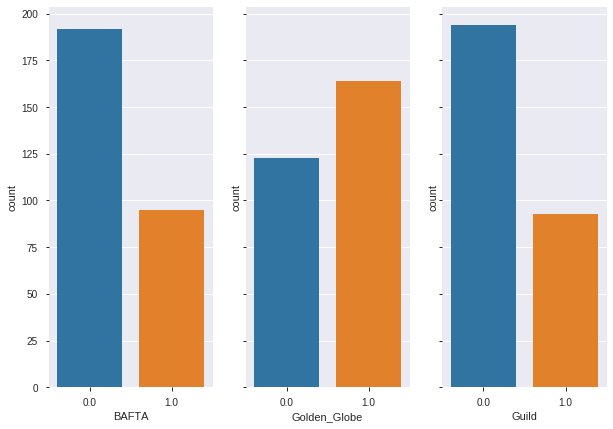

In [91]:
import seaborn as sns

#Sub-setting dataframe
Winning_Awards = df[['Oscar', 'BAFTA', 'Golden_Globe', 'Guild',]]
y = Winning_Awards[(Winning_Awards['Oscar'] == 1)]

 #Plotting
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(10,7),ncols=3, sharey=True)

sns.countplot(x="BAFTA", data=y, ax=ax1)
sns.countplot(x="Golden_Globe", data=y, ax=ax2)
sns.countplot(x="Guild", data=y, ax=ax3)

plt.show()

## Quarterly release dates:
Let's visually take a look at which films are most likely to be nominated by release date.

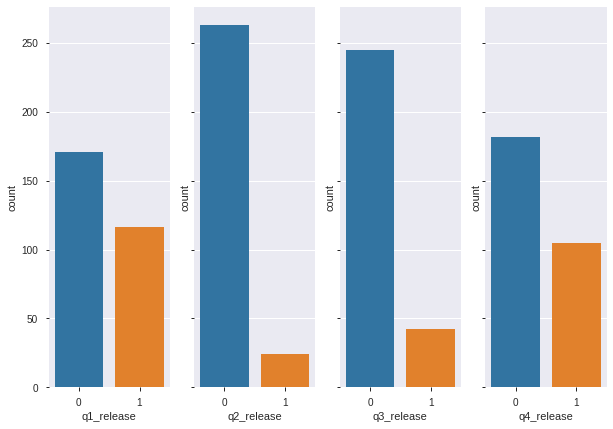

In [92]:
#Sub-setting dataframe
 Release_Date_Success = df[['Oscar', 'q1_release',	'q2_release',	'q3_release',	'q4_release']]
 y = Release_Date_Success[(Release_Date_Success['Oscar'] == 1)]

# Best Months for Release:
# Q1: 1 January – 31 March
# Q4: 1 October – 31 December

fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(10,7),ncols=4, sharey=True)

sns.countplot(x="q1_release", data=y, ax=ax1)
sns.countplot(x="q2_release", data=y, ax=ax2)
sns.countplot(x="q3_release", data=y, ax=ax3)
sns.countplot(x="q4_release", data=y, ax=ax4)

plt.show()

Conclusion is, films released in **Q1** and **Q4** are more likely to win an Oscar.

## Ratings

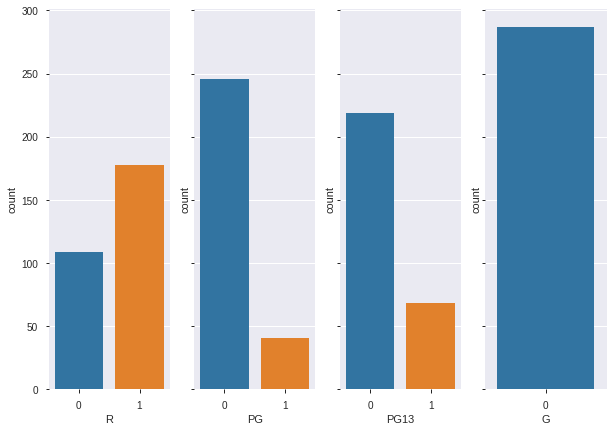

In [95]:
#Sub-setting dataframe
 Rating_Success = df[['Oscar','R', 'PG',	'PG13',	'G']]
 y = Rating_Success[(Rating_Success['Oscar'] == 1)]

 fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(10,7),ncols=4, sharey=True)

sns.countplot(x="R", data=y, ax=ax1)
sns.countplot(x="PG", data=y, ax=ax2)
sns.countplot(x="PG13", data=y, ax=ax3)
sns.countplot(x="G", data=y, ax=ax4)

plt.show()

**R** rated films more likely to win an Oscar.


## Running Time

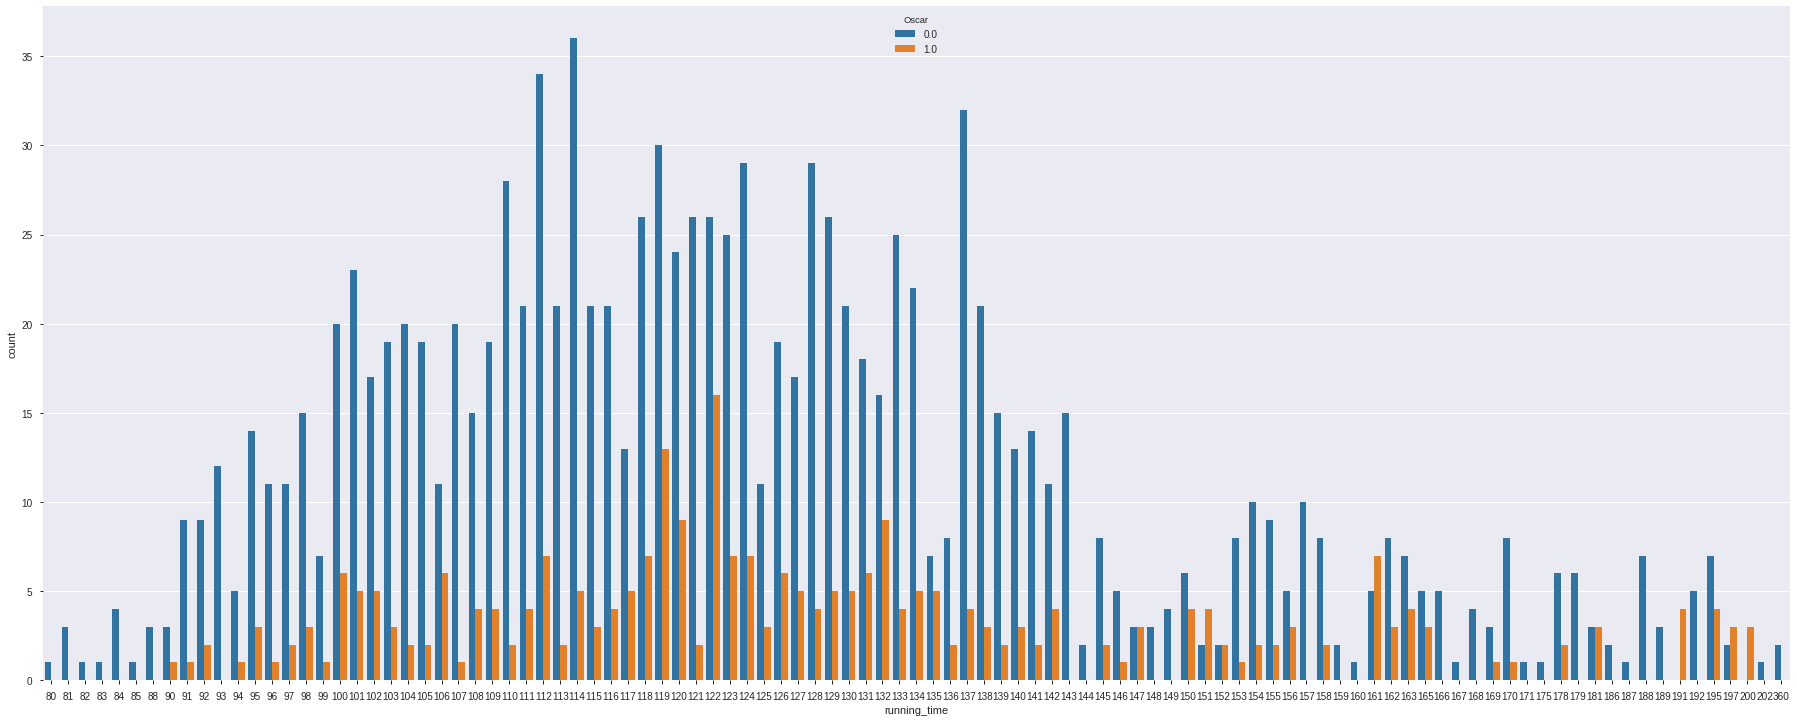

In [96]:
#Plotting
f, axis = plt.subplots(figsize=(25, 10))
plt.tight_layout()
sns.countplot(x='running_time', hue='Oscar', data=df)
plt.show()

In [109]:
# running_time
is_long = df.running_time >= 119
is_long.head()

0     True
1    False
2     True
3     True
4    False
Name: running_time, dtype: bool

In [118]:
# Running times with most Oscar films and Nominations 
df[df.running_time.isin(['119','122','132'])]

,year,category,film,name,BAFTA,Golden_Globe,Guild,Oscar,running_time,box_office,imdb_score,rt_audience_score,rt_critic_score,stars_count,writers_count,produced_USA,R,PG,PG13,G,q1_release,q2_release,q3_release,q4_release
11,1982,Actor,Missing,Jack Lemmon,0.0,0.0,0.0,0.0,122,1.416000e+09,7.8,85.0,97.0,4.0,1.0,1,0,1,0,0,1,0,0,0
30,1986,Actor,Children of a Lesser God,William Hurt,0.0,0.0,0.0,0.0,119,3.185308e+07,7.2,78.0,81.0,4.0,2.0,1,1,0,0,0,0,0,0,1
53,1991,Actor,The Prince of Tides,Nick Nolte,0.0,1.0,0.0,0.0,132,1.100000e+08,6.7,70.0,73.0,7.0,1.0,1,1,0,0,0,0,0,0,1
73,1995,Actor,Dead Man Walking,Sean Penn,0.0,0.0,0.0,0.0,122,8.300000e+07,7.6,86.0,95.0,6.0,1.0,1,1,0,0,0,1,0,0,0
89,1998,Actor,American History X,Edward Norton,0.0,0.0,0.0,0.0,119,2.390000e+07,8.6,96.0,83.0,7.0,1.0,1,1,0,0,0,0,0,0,1
90,1999,Actor,American Beauty,Kevin Spacey,1.0,0.0,1.0,1.0,122,3.563000e+08,8.4,93.0,88.0,8.0,1.0,1,1,0,0,0,0,0,0,1
98,2000,Actor,Pollock,Ed Harris,0.0,0.0,0.0,0.0,122,1.055897e+07,7.0,74.0,81.0,1.0,1.0,1,1,0,0,0,1,0,0,0
100,2001,Actor,Training Day,Denzel Washington,0.0,0.0,0.0,1.0,122,1.045000e+08,7.7,89.0,72.0,6.0,1.0,1,1,0,0,0,0,0,0,1
119,2004,Actor,Million Dollar Baby,Clint Eastwood,0.0,0.0,0.0,0.0,132,2.168000e+08,8.1,90.0,91.0,2.0,1.0,1,0,0,1,0,1,0,0,0
131,2007,Actor,Michael Clayton,George Clooney,0.0,0.0,0.0,0.0,119,9.290000e+07,7.3,69.0,90.0,4.0,1.0,1,1,0,0,0,0,0,0,1


In [0]:
import numpy as np

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    # return the wrangled dataframe
    return X


train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

## Begin with baselines for classification.

>My target is to predict the `Oscars`. Lets see what our baseline accuracy would be, if we guessed the majority class for every prediction:


In [111]:
Oscar_success = df.Oscar
print('Minimum ', Oscar_success.min())
print('Average ', Oscar_success.mean())
print('Maximum ', Oscar_success.max())

Minimum  0.0
Average  0.19365721997300944
Maximum  1.0


In [110]:
box_office_success = df.box_office
print('Minimum $', box_office_success.min())
print('Average $', box_office_success.mean())
print('Maximum $', box_office_success.max())

Minimum $ 538534.0
Average $ 127736084.17476383
Maximum $ 1416000000.0


In [0]:
# Arrange y target vectors
target = 'Oscar'
y_train = train[target]
y_test = test[target]

In [105]:
df['Oscar'].value_counts(normalize=True)

0.0    0.806343
1.0    0.193657
Name: Oscar, dtype: float64

In [106]:
print ('The baseline Accuracy:',df['Oscar'].value_counts(normalize=True).max())

The baseline Accuracy: 0.8063427800269906


In [0]:
# Arrange y target vecotrs
target = 'Oscar'
y_train = df[target]
y_test = df[target]

## Holding out our test set.

In [122]:
from sklearn.model_selection import train_test_split
df[(df.year == 2014) & (df.year == 2015)]
train = df[df.year < 2014]
val = df[df.year == 2015]
test = df[df.year == 2016]
len(test)

train.shape, val.shape, test.shape

((1352, 24), (43, 24), (44, 24))

# Engineer new feature

In [129]:
#oscar_data into train and val sets:

target = 'Oscar'
# Split into oscar_data train/val and test data:
oscar_data, test = train_test_split(df, 
                                      train_size=0.80, 
                                      stratify=df[target], 
                                      shuffle=True)
train.shape, val.shape, test.shape

((1352, 24), (43, 24), (297, 24))

In [130]:
train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
category,1352,8,Picture,192
film,1352,585,Chicago,7
name,1352,891,Woody Allen,18


In [131]:
# The Oscar column is our target
target = 'Oscar'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target,'year','produced_USA'	])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get our series with cardinality of nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get our categorical features with a cardinaity <=50
# action_type and game_date
categorical_features = cardinality[cardinality<=50].index.tolist()

# Lets combine the lists
features = numeric_features + categorical_features
print(features)

['BAFTA', 'Golden_Globe', 'Guild', 'running_time', 'box_office', 'imdb_score', 'rt_audience_score', 'rt_critic_score', 'stars_count', 'writers_count', 'R', 'PG', 'PG13', 'G', 'q1_release', 'q2_release', 'q3_release', 'q4_release', 'category']


In [0]:
 features = ['BAFTA', 'Golden_Globe', 'Guild', 
             'running_time', 'box_office', 'imdb_score', 
             'rt_audience_score', 'rt_critic_score', 
             'stars_count', 'writers_count', 'R', 'PG', 'PG13', 'G', 
             'q1_release', 'q2_release', 'q3_release', 'q4_release', 'category']


# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]
X_val = val[features]
y_val = val[target]


In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

encoder = ce.OneHotEncoder(use_cat_names=True)
imputer = SimpleImputer()
scaler = StandardScaler()
model = LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs=-1)

X_train_encoded = encoder.fit_transform(X_train)
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_train_scaled = scaler.fit_transform(X_train_imputed)
model.fit(X_train_scaled, y_train)

X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)
y_pred = model.predict(X_test_scaled)

In [161]:
%%time
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

# These are the only two changes from the previous code cell:
# Remove StandardScaler (it's not needed or helpful for trees)
# Trying out RandomForestClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
  RandomForestClassifier(n_estimators = 100, max_depth=25, random_state=0)
)

# Fit on train
pipeline.fit(X_train, y_train)
# Fit on train
pipeline.fit(X_train, y_train)

# Score on train, val
print('Our Train Accuracy is:', pipeline.score(X_train, y_train))
print('Our Validation Accuracy is:', pipeline.score(X_val, y_val))

# Predict on test
y_pred = pipeline.predict(X_test)

Our Train Accuracy is: 1.0
Our Validation Accuracy is: 0.8604651162790697
CPU times: user 596 ms, sys: 4.24 ms, total: 600 ms
Wall time: 601 ms


In [135]:
pipeline.named_steps

{'onehotencoder': OneHotEncoder(cols=['category'], drop_invariant=False, handle_missing='value',
               handle_unknown='value', return_df=True, use_cat_names=True,
               verbose=0),
 'randomforestclassifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=25, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=0, verbose=0,
                        warm_start=False),
 'simpleimputer': SimpleImputer(add_indicator=False, copy=True, fill_value=None,
               missing_values=nan, strategy='mean', verbose=0)}

In [136]:
pipeline.named_steps['randomforestclassifier']

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [164]:
pipeline.named_steps['onehotencoder']

OneHotEncoder(cols=['category'], drop_invariant=False, handle_missing='value',
              handle_unknown='value', return_df=True, use_cat_names=True,
              verbose=0)

In [165]:
pipeline.named_steps['simpleimputer']

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [166]:
print('X_train shape before encoding', X_train.shape)

encoder = pipeline.named_steps['onehotencoder']
encoded = encoder.transform(X_train)

print('X_train shape after encoding', encoded.shape)

X_train shape before encoding (1352, 19)
X_train shape after encoding (1352, 26)


In [167]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
rf.feature_importances_,

(array([0.04482208, 0.14417171, 0.0884341 , 0.0815529 , 0.09965803,
        0.07328362, 0.08129986, 0.06944536, 0.06393943, 0.01321132,
        0.01431948, 0.01199598, 0.01206295, 0.00084512, 0.01344514,
        0.00898633, 0.01016863, 0.01382757, 0.01844594, 0.01426697,
        0.02236515, 0.01631217, 0.02241024, 0.02204309, 0.02109465,
        0.01759217]),)

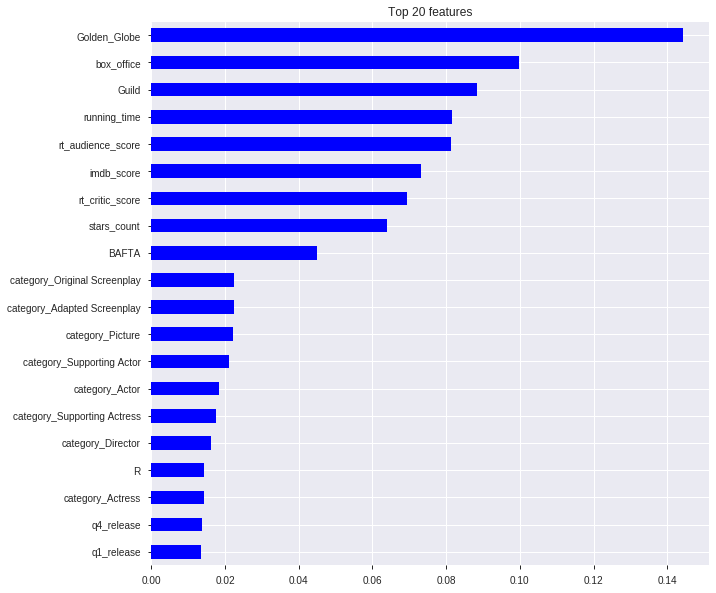

In [169]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)

# Plot top n feature importances
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='blue');

In [170]:
%%time

# Arrange data into X features matrix and y target vector
# so we use *all* features, including the high-cardinality categoricals
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

# The pipeline is identical to the example cell above, 
# except we're replacing one-hot encoder with "ordinal" encoder
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8604651162790697
CPU times: user 463 ms, sys: 46.1 ms, total: 509 ms
Wall time: 502 ms


In [171]:
print('X_train shape before', X_train.shape)

encoder = pipeline.named_steps['ordinalencoder']
encoded = encoder.transform(X_train)

print('X_train shape after encoding', encoded.shape)

X_train shape before (1352, 23)
X_train shape after encoding (1352, 23)


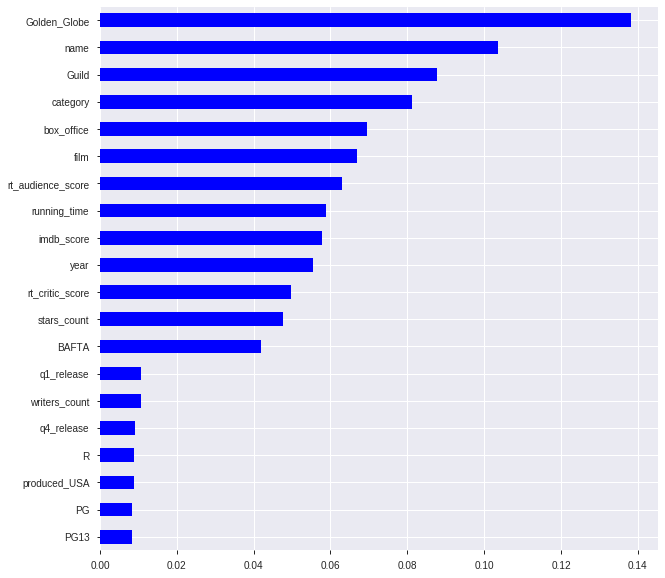

In [176]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)

# Plot top n feature imporances
n = 20
plt.figure(figsize=(10,n/2))
importances.sort_values()[-n:].plot.barh(color='blue');

## Model Validation accuracy:

In [177]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_distributions = {
    'randomforestclassifier__n_estimators': range(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': uniform(0.2, 0.8), 
}

search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=30, 
    cv=3, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=42
)

search.fit(X_train, y_train)
print('Validation accuracy', search.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.3min finished


Validation accuracy 0.856508875739645


## Target distribution:

In [179]:
y = train['Oscar']
y.nunique

<bound method IndexOpsMixin.nunique of 0       1.0
1       0.0
2       0.0
3       0.0
4       1.0
5       0.0
6       0.0
7       0.0
8       0.0
9       1.0
10      0.0
11      0.0
12      0.0
13      0.0
14      1.0
15      0.0
16      0.0
17      0.0
18      1.0
19      0.0
20      0.0
21      0.0
22      0.0
23      1.0
24      0.0
25      0.0
26      0.0
27      0.0
28      1.0
29      0.0
30      0.0
31      0.0
32      1.0
33      0.0
34      0.0
35      0.0
36      1.0
37      0.0
38      0.0
39      0.0
40      1.0
41      0.0
42      0.0
43      0.0
44      0.0
45      1.0
46      0.0
47      0.0
48      0.0
49      0.0
50      1.0
51      0.0
52      0.0
53      0.0
54      0.0
55      1.0
56      0.0
57      0.0
58      0.0
59      0.0
60      1.0
61      0.0
62      0.0
63      0.0
64      0.0
65      1.0
66      0.0
67      0.0
68      0.0
69      0.0
70      1.0
71      0.0
72      0.0
73      0.0
74      0.0
75      1.0
76      0.0
77      0.0
78      0.0
79      0.0
8

In [180]:
y.value_counts(normalize=True).max()

0.7995562130177515

In [181]:
train['Oscar'].nunique()

2

In [182]:
train['Oscar'].unique()

array([1., 0.])

In [184]:
train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
category,1352,8,Picture,192
film,1352,585,Chicago,7
name,1352,891,Woody Allen,18


In [0]:
# Drop some high cardinality categoricals:
train = train.drop(columns=['film','name'])

In [187]:
train.isna().sum().sort_values()

year                 0
q2_release           0
q1_release           0
G                    0
PG13                 0
PG                   0
R                    0
produced_USA         0
writers_count        0
stars_count          0
rt_critic_score      0
rt_audience_score    0
imdb_score           0
box_office           0
running_time         0
Oscar                0
Guild                0
Golden_Globe         0
BAFTA                0
category             0
q3_release           0
q4_release           0
dtype: int64

In [195]:
# What do I do with 0 sample(s)?
# (shape=(0, 22)) while a minimum of 1 is required.
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

target = 'Oscar'
features = train.columns.drop([target])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8372093023255814


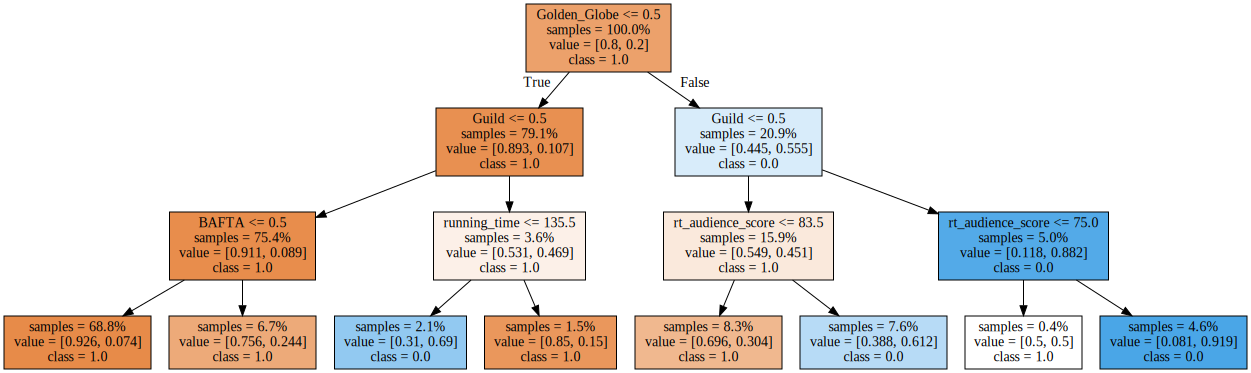

In [196]:
# Visualize decision tree
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree, 
    out_file=None, 
    feature_names=X_train.columns, 
    class_names=y.unique().astype(str), 
    filled=True, 
    impurity=False,
    proportion=True
)

graphviz.Source(dot_data)

In [198]:
from sklearn.metrics import roc_curve
y_pred_proba = pipeline.predict_proba(X_val)[:, -1] # Probability for the last class
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Lets see the results in a table:
pd.DataFrame({
    'False Positive Rate': fpr, 
    'True Positive Rate': tpr, 
    'Threshold': thresholds
})

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000,1.919355
1,0.000000,0.375,0.919355
2,0.000000,0.625,0.689655
3,0.114286,0.625,0.611650
4,0.171429,0.625,0.303571
5,0.171429,1.000,0.244444
6,1.000000,1.000,0.074194


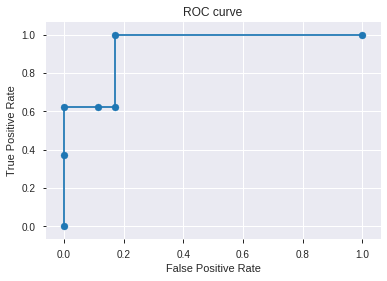

In [199]:
# Lets see the results on a plot.
# This is our: "Receiver Operating Characteristic curve"
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [200]:
# Lets use scikit-learn to calculate the area under the curve:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred_proba)

0.9357142857142857

##Permutation Importances

In [202]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap
    !pip install pandas-profiling==2.*

In [207]:
import eli5
from eli5.sklearn import PermutationImportance


# Lets calculate our permutation importances:
permuter = PermutationImportance(
    model, 
    scoring='accuracy', 
    n_iter=5, 
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:461: FutureWarn

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                     

In [208]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

rt_audience_score   -4.651163e-03
category            -2.220446e-17
BAFTA               -2.220446e-17
year                 0.000000e+00
q2_release           0.000000e+00
G                    0.000000e+00
PG                   0.000000e+00
produced_USA         0.000000e+00
writers_count        0.000000e+00
q3_release           0.000000e+00
q4_release           0.000000e+00
running_time         0.000000e+00
rt_critic_score      0.000000e+00
imdb_score           4.651163e-03
PG13                 9.302326e-03
q1_release           9.302326e-03
R                    1.395349e-02
box_office           1.395349e-02
Golden_Globe         3.255814e-02
stars_count          4.186047e-02
Guild                1.209302e-01
dtype: float64

In [209]:
# Permutation Importances:
eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=feature_names 
)

Weight,Feature
0.1209 ± 0.0186,Guild
0.0419 ± 0.0348,stars_count
0.0326 ± 0.0228,Golden_Globe
0.0140 ± 0.0372,box_office
0.0140 ± 0.0228,R
0.0093 ± 0.0228,q1_release
0.0093 ± 0.0228,PG13
0.0047 ± 0.0186,imdb_score
0 ± 0.0000,rt_critic_score
0 ± 0.0000,running_time


## Partial Dependence Plot, 1 feature isolation

> Fit Linear Regression model



In [210]:
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(
    ce.TargetEncoder(),  
    LinearRegression()
)

lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_val, y_val))

Linear Regression R^2 0.370651758191442


## Explaining Linear Regression

In [211]:
coefficients = lr.named_steps['linearregression'].coef_
pd.Series(coefficients, features)

year                -3.879663e-03
category             2.941413e+00
BAFTA                1.606075e-01
Golden_Globe         3.461234e-01
Guild                3.752729e-01
running_time        -4.534895e-04
box_office           8.352859e-11
imdb_score           1.245232e-01
rt_audience_score   -1.483278e-04
rt_critic_score      1.410633e-04
stars_count          5.695141e-03
writers_count       -2.893006e-02
produced_USA         3.064861e-02
R                    4.266218e-02
PG                   3.961991e-02
PG13                 1.930477e-03
G                   -8.421256e-02
q1_release           2.558787e-02
q2_release          -1.744507e-02
q3_release           1.398372e-02
q4_release          -2.212652e-02
dtype: float64

## Fit Gradient Boosting model

In [212]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Gradient Boosting R^2 0.60353278929856


## Partial Dependence Plots

In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'box_office'

isolated = pdp_isolate(
    model=gb, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

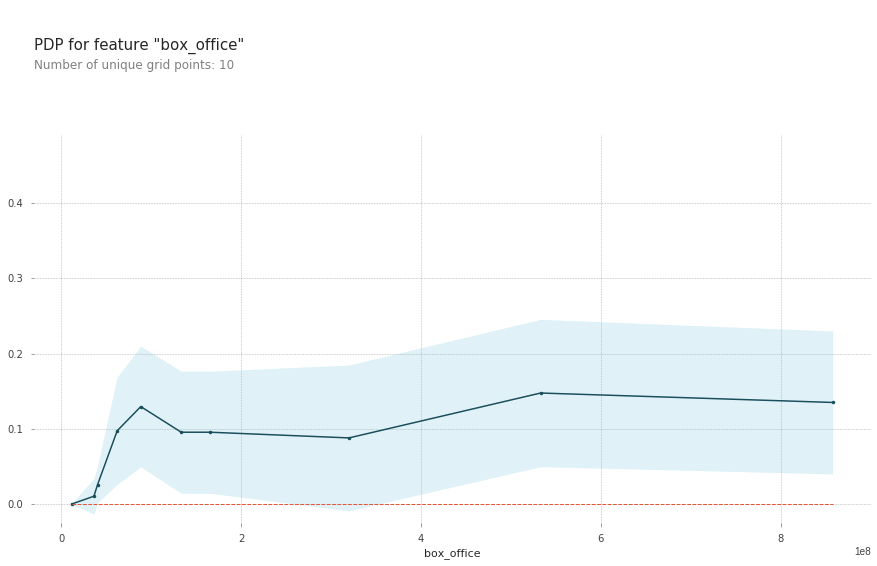

In [218]:
pdp_plot(isolated, feature_name=feature);